# Misc analysis in R (Kawajiri et al)
- K. Ishigaki
- Prepare figures

In [39]:
library(magrittr)
library(data.table)
library(ggsci)
library(ggplot2)

## Metadata

In [55]:
meta <- readRDS(file = "metadata_v1.rds")
show(meta)

                              Name Dataset   Subset1
1                    MP_Tbet+_1_D2      D2 MP(Tbet+)
2                    MP_Tbet+_2_D2      D2 MP(Tbet+)
3                    MP_Tbet+_3_D2      D2 MP(Tbet+)
4                    MP_Tbet-_1_D2      D2 MP(Tbet-)
5                    MP_Tbet-_2_D2      D2 MP(Tbet-)
6                    MP_Tbet-_3_D2      D2 MP(Tbet-)
7                       Naive_1_D2      D2     Naive
8                       Naive_2_D2      D2     Naive
9                       Naive_3_D2      D2     Naive
10                 Treg_Nrp1+_1_D2      D2     nTreg
11                 Treg_Nrp1+_2_D2      D2     nTreg
12                 Treg_Nrp1+_3_D2      D2     nTreg
13                 Treg_Nrp1-_1_D2      D2     iTreg
14                 Treg_Nrp1-_2_D2      D2     iTreg
15                 Treg_Nrp1-_3_D2      D2     iTreg
16              SPF_MP1_Tbet-hi_D1      D1 MP(Tbet+)
18              SPF_MP1_Tbet-lo_D1      D1 MP(Tbet-)
19              SPF_MP2_Tbet-hi_D1      D1 MP(

In [56]:
table(meta$Dataset)
table(meta$Subset1)
dim(meta)


D1 D2 
21 15 


MP(Tbet+) MP(Tbet-)     Naive     iTreg     nTreg 
        6         6         6         8        10 

[1] 36  3

In [57]:
#all IMGT positions
all_imgt_pos <- c(
    "P104","P105","P106","P107","P108","P109","P110","P111",
    "P111.1","P112.2","P112.1",
    "P112","P113","P114","P115","P116","P117","P118")
length(all_imgt_pos)

[1] 18

In [58]:
all_aa <- c("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", 
            "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")
length(all_aa)

[1] 20

## Amino acid usage ratio (midCDR3; productive; D1+D2)

In [59]:
df <- read.table("data_midCDR3AA_freq.txt",header=T)
dim(df)
head(df,n=3)

[1] 720   5

,Name,variable,value,Dataset,Subset1
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Exp_1_Mouse_1_Helios+_Treg_A_D1,R,0.09296698,D1,nTreg
2,Exp_1_Mouse_1_Helios+_Treg_A_D1,L,0.09612434,D1,nTreg
3,Exp_1_Mouse_1_Helios+_Treg_A_D1,Q,0.06799381,D1,nTreg


In [60]:
all_aa <- c("A", "C", "D", "E", "F", "G", "H", "I", "K", "L", 
            "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y")
length(all_aa)

[1] 20

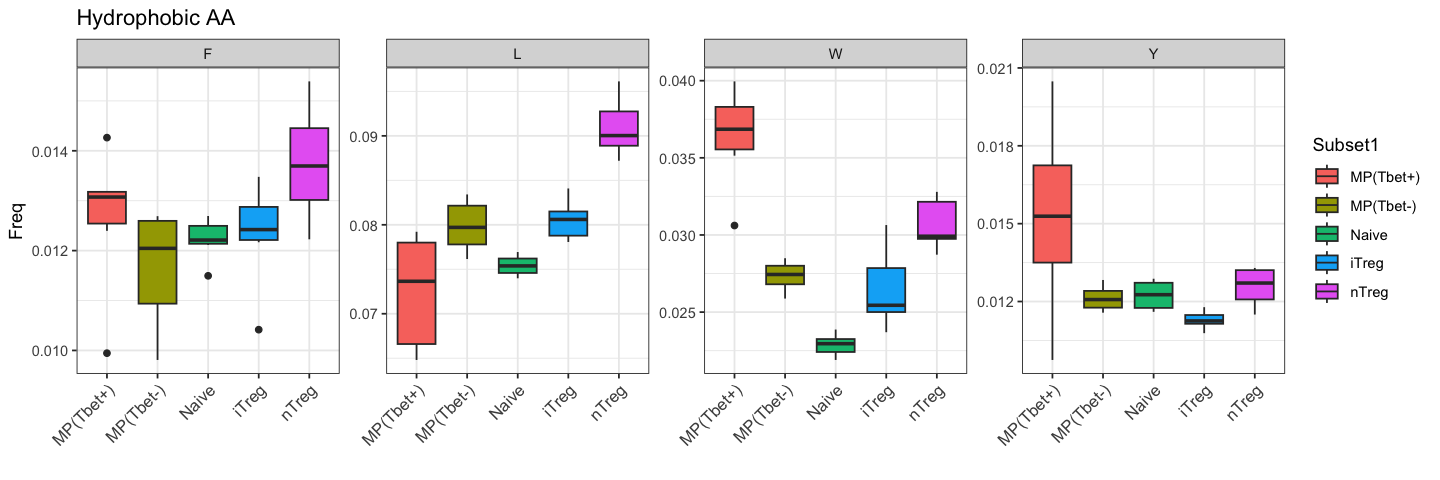

In [61]:
#hydrophobic
Title="Hydrophobic AA"
df2 <- df[df$variable %in% c("L","F","W","Y"),]

options(repr.plot.height=4, repr.plot.width=12)

df2 %>% ggplot(aes(x=Subset1,y=value,fill=Subset1)) +
    geom_boxplot() +
    facet_wrap(~variable,scale="free_y",nrow=1) +
    theme_bw() +
    labs(title=Title,y="Freq",x="") + 
    theme( axis.text.x=element_text(size=10,angle=45,vjust = 1, hjust=1)) 

## V gene

In [62]:
TITLE="Vgene:productive:D1+D2"

In [63]:
input <- read.table("data_Vgene_freq.txt",header=T,row.names=1)
dim(input)
head(input,n=3)

[1] 36 22

,TCRBV01.01,TCRBV02.01,TCRBV03.01,TCRBV04.01,TCRBV05.01,TCRBV12.01,TCRBV12.02,TCRBV13.01,TCRBV13.02,TCRBV13.03,⋯,TCRBV16.01,TCRBV17.01,TCRBV19.01,TCRBV20.01,TCRBV21.01,TCRBV23.01,TCRBV26.01,TCRBV29.01,TCRBV30.01,TCRBV31.01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MP_Tbet+_1_D2,0.07042254,0.05390966,0.07430792,0.02744051,0.06532297,0.01554153,0.01311316,0.06677999,0.1777562,0.05026712,⋯,0.03909665,0.01238465,0.07527926,0.05755221,0.002185527,0.005585236,0.03035454,0.05293832,0.003399709,0.05390966
MP_Tbet+_2_D2,0.06498115,0.04457751,0.05788423,0.01973830,0.06609004,0.01485917,0.01419383,0.07052562,0.2140164,0.04768241,⋯,0.03659348,0.01086715,0.06675538,0.06387226,0.001330672,0.006431581,0.03215791,0.06742071,0.003992016,0.04280328
MP_Tbet+_3_D2,0.07798800,0.03922473,0.05768343,0.02745731,0.06068297,0.01292109,0.01153669,0.07683433,0.2055838,0.05260729,⋯,0.03899400,0.01153669,0.06783572,0.06275958,0.002076604,0.003691740,0.03553299,0.06783572,0.002999539,0.04291647


In [64]:
#do pca
pca <- prcomp(input, scale = T, center=T)

eigs <- pca$sdev^2
eigs[1] / sum(eigs) #var explained by PC1
eigs[2] / sum(eigs) #var explained by PC2

[1] 0.3303257

[1] 0.2661767

In [65]:
#PC score
df <- data.frame(PC1=pca$x[,1],PC2=pca$x[,2],Name=row.names(input))
df <- merge(df,meta,by="Name")
dim(df)
head(df,n=2)

[1] 36  5

,Name,PC1,PC2,Dataset,Subset1
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Exp_1_Mouse_1_Helios+_Treg_A_D1,2.249842,-4.700962,D1,nTreg
2,Exp_1_Mouse_1_Helios+_Treg_B_D1,1.933041,-5.000373,D1,nTreg


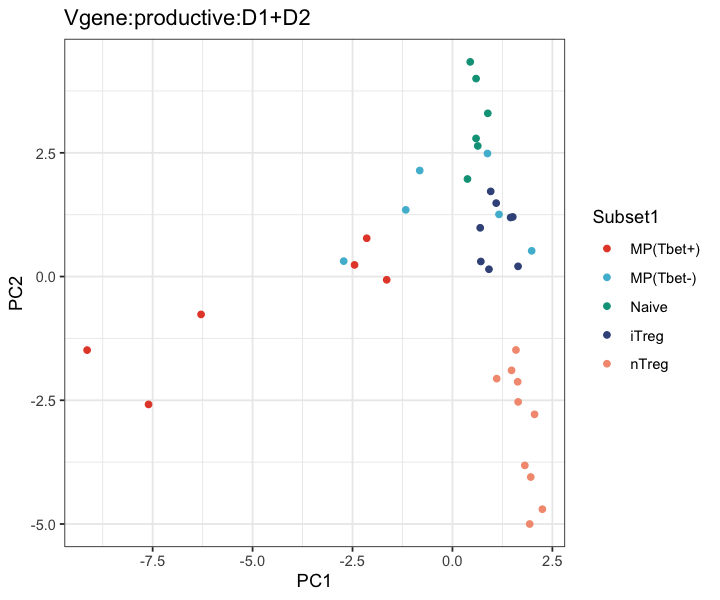

In [66]:
options(repr.plot.height=5,repr.plot.width=6)

df %>% ggplot(aes(x=PC1,y=PC2,color=Subset1)) +
    geom_point() +
    theme_bw() +
    scale_color_npg()+
    labs(title=TITLE)

In [67]:
#V gene frequency
d1 <- data.frame(Name=row.names(input),input)
df <- reshape2::melt(d1,id.vars = "Name")
dim(df)
df <- merge(df,meta,by="Name")
dim(df)
head(df,n=3)

[1] 792   3

[1] 792   5

,Name,variable,value,Dataset,Subset1
,<chr>,<fct>,<dbl>,<chr>,<chr>
1,Exp_1_Mouse_1_Helios+_Treg_A_D1,TCRBV01.01,0.04561927,D1,nTreg
2,Exp_1_Mouse_1_Helios+_Treg_A_D1,TCRBV14.01,0.01172126,D1,nTreg
3,Exp_1_Mouse_1_Helios+_Treg_A_D1,TCRBV13.01,0.04088568,D1,nTreg


In [68]:
Title="V gene (D1+D2)"
target <- c("TCRBV13.02","TCRBV20.01","TCRBV12.01","TCRBV12.02")
df2 <- df[df$variable %in% target,]

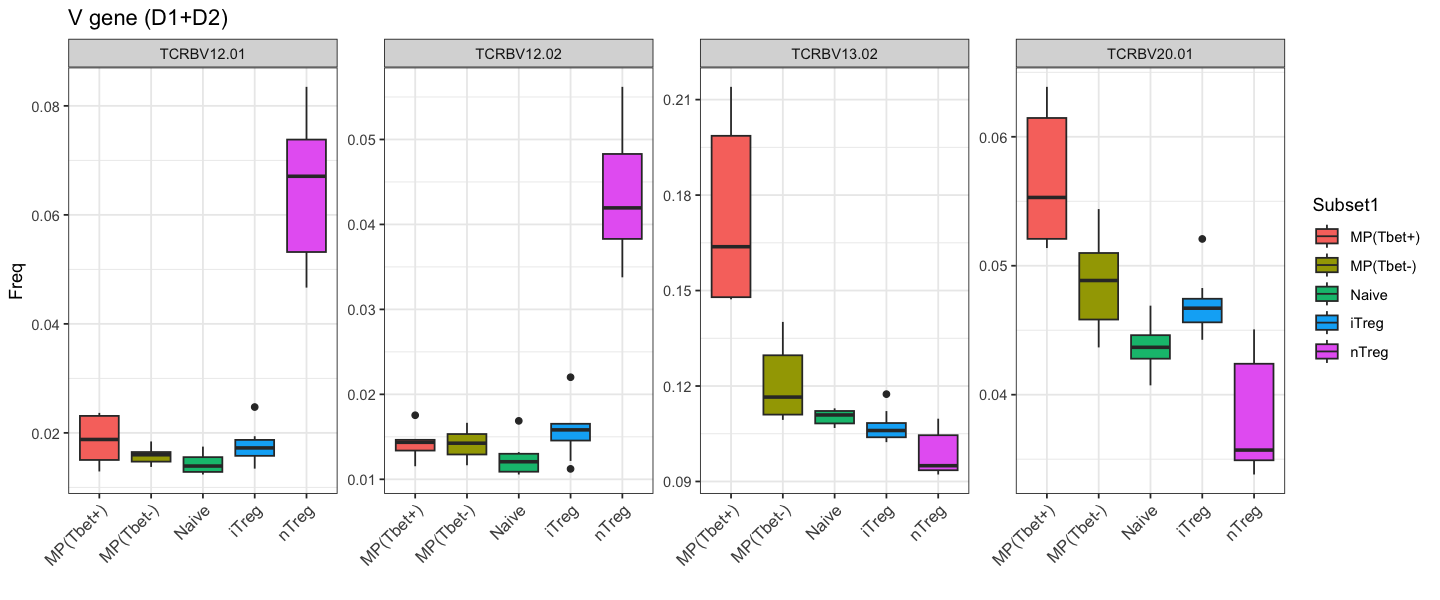

In [69]:
options(repr.plot.height=5, repr.plot.width=12)

df2 %>% ggplot(aes(x=Subset1,y=value,fill=Subset1)) +
    geom_boxplot() +
    facet_wrap(~variable,scale="free_y",nrow=1) +
    theme_bw() +
    labs(title=Title,y="Freq",x="") + 
    theme( axis.text.x=element_text(size=10,angle=45,vjust = 1, hjust=1)) 